<a href="https://colab.research.google.com/github/deep12030/Advance-Machine-learning-DL-/blob/main/Advance_Machine_Learning_Fruits_CLassification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework assignment - Fruits

This notebook is the stub you have to fill out for the homework. Read the task description and implement the empty code cells. Each section represents a stage along implementing an image classifier from loading and inspecting the dataset to making something working. The section descriptions contain what to do in that step.

Copy this notebook to your drive (File -> Save a copy in Drive), edit it and upload the final ipynb file to [canvas.elte.hu](https://canvas.elte.hu) or upload the link to the Colab notebook itself. If you have your own machine with Jupyter installed, you can work there as well.

**Note** Make sure the notebook is using GPU accelerataion in Edit -> Notebook settings, otherwise training and evaluation can be very slow.

## Task description
Your task is to implement a deep learning classifier of fruit images. The dataset contains segmented images of 60 different fruits. You'll have to implement a convolutional network.

## Rules and Comments
- This is an ML class so to pass the homework you do have to implement a working classifier, just loading the data is not enough.
- As always, copying others' code will make you fail the homework automatically (and thus the course)
- Make sure your code can be run from an empty state (use Runtime -> Run all in the menu after restarting the notebook)
- Feel free to add more code cells as needed. But don't put code into external Python files to ease the reviewing.
- Please add your name and Neptun ID in the box below for easier identification.

**Name:** DEEPAK kUMAR  
**Neptun ID:** L4NXIJ

In [ ]:
# Keras 2.3.1 has a bug in evalutation, downgrade it
%tensorflow_version 1.x
!pip install -U keras==2.2.5

TensorFlow 1.x selected.
     |████████████████████████████████| 337kB 6.2MB/s 
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [ ]:
# Some useful imports
import matplotlib.pyplot as plt
import numpy as np
import pickle

## Dataset preparations
First download the data and extract it:

In [ ]:
!wget http://vegesm.web.elte.hu/fruits_small.zip
!unzip fruits_small.zip > /dev/null

--2020-05-12 14:10:52--  http://vegesm.web.elte.hu/fruits_small.zip
Resolving vegesm.web.elte.hu (vegesm.web.elte.hu)... 157.181.1.225
Connecting to vegesm.web.elte.hu (vegesm.web.elte.hu)|157.181.1.225|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 186322919 (178M) [application/zip]
Saving to: ‘fruits_small.zip’

fruits_small.zip    100%[===================>] 177.69M  9.31MB/s    in 31s     

2020-05-12 14:11:23 (5.70 MB/s) - ‘fruits_small.zip’ saved [186322919/186322919]



This will download and extract the dataset into `/content/fruits-small`. You can inspect the files in the sidebar on the left, under the *Files* tab. The dataset contains 100x100 pixel images of fruits, grouped by classes into folders. 

Notice that the dataset does not define a validation set, you have to split it yourself. Split the training set into a training and validation set. Make sure in the validation set the classes have a similar distribution to the training set.



Now that you have set up the dataset, it's time to look at some of the images. Create a function that randomly selects 4 images and prints them with the class names.

cateogries of fruits: 60
['Strawberry', 'Grape Pink', 'Rambutan', 'Blueberry', 'Pomelo Sweetie', 'Mandarine', 'Grapefruit White', 'Apple Golden 3', 'Plum', 'Cocos', 'Cherry 1', 'Redcurrant', 'Hazelnut', 'Peach 2', 'Lemon', 'Nut Pecan', 'Apple Pink Lady', 'Orange', 'Pear', 'Apple Braeburn', 'Cherry Rainier', 'Physalis with Husk', 'Apple Red 2', 'Passion Fruit', 'Apple Red Delicious', 'Maracuja', 'Mulberry', 'Pear Monster', 'Tomato 1', 'Pineapple Mini', 'Cherry Wax Red', 'Potato Red Washed', 'Nectarine Flat', 'Apple Red Yellow 2', 'Onion Red Peeled', 'Tomato Yellow', 'Banana Red', 'Tamarillo', 'Banana', 'Apple Golden 1', 'Grape White 2', 'Pear Williams', 'Avocado', 'Limes', 'Eggplant', 'Potato White', 'Cantaloupe 1', 'Granadilla', 'Tomato Cherry Red', 'Tomato 3', 'Pepper Yellow', 'Mango Red', 'Carambula', 'Plum 3', 'Kohlrabi', 'Pepper Green', 'Pear Forelle', 'Chestnut', 'Kaki', 'Grape White 4']


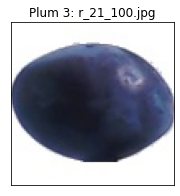

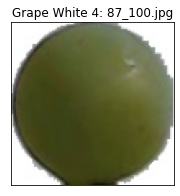

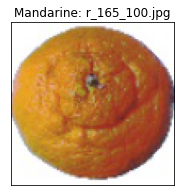

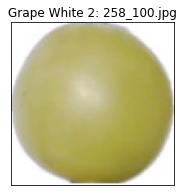

In [ ]:
import os
from skimage import io

a=os.listdir('fruits-small/train')
print("cateogries of fruits: " + str(len(a)))
for i in range(len(a)):
  path='fruits-small/train/' +a[i]
  b=os.listdir(path)
  #print("no.image  "+ a[i]+"= "+ str(len(b)))


ran=np.random.permutation(len(a))
for i in ran[:4]:

  path='fruits-small/train/' +a[i]
  b=os.listdir(path)

  ran=np.random.permutation(len(b))[0]
  image_path=path+ '/' +b[ran]
  img=io.imread(image_path)
  plt.figure(figsize=(3,3))
  plt.imshow(img)
  title=a[i]+": "+b[ran]
  plt.title(title)
  plt.xticks([])
  plt.yticks([])
print(a)

In [ ]:
# ADD YOUR CODE HERE
print (a)


['Tamarillo', 'Strawberry', 'Physalis with Husk', 'Cantaloupe 1', 'Kaki', 'Tomato Yellow', 'Mango Red', 'Apple Golden 1', 'Apple Golden 3', 'Lemon', 'Nectarine Flat', 'Pomelo Sweetie', 'Peach 2', 'Grape White 2', 'Blueberry', 'Pear Forelle', 'Orange', 'Rambutan', 'Tomato 1', 'Banana Red', 'Limes', 'Pear Williams', 'Apple Red Yellow 2', 'Kohlrabi', 'Tomato 3', 'Chestnut', 'Banana', 'Cocos', 'Mulberry', 'Pear', 'Hazelnut', 'Grape White 4', 'Grapefruit White', 'Passion Fruit', 'Avocado', 'Carambula', 'Nut Pecan', 'Apple Pink Lady', 'Onion Red Peeled', 'Pineapple Mini', 'Pepper Green', 'Grape Pink', 'Cherry Wax Red', 'Potato White', 'Apple Red 2', 'Maracuja', 'Cherry Rainier', 'Eggplant', 'Mandarine', 'Redcurrant', 'Granadilla', 'Potato Red Washed', 'Plum 3', 'Plum', 'Tomato Cherry Red', 'Pear Monster', 'Apple Braeburn', 'Cherry 1', 'Pepper Yellow', 'Apple Red Delicious']


### Splitting the dataset

Notice that the dataset does not define a validation set, you have to split it yourself. Split the training set into a training and validation set. 

### Preprocess the dataset

We need to augment the data, since we do not have many images per classes. Create an augmentation mechanism, data automatically does the following transformations during training:
- flip images horizontally
- rotates them
- performs zooming

In [ ]:
import os, random, math
from pprint import pprint
from datetime import datetime as dt

import numpy as np
import keras as k

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

SEED = 1337
np.random.seed(SEED)

BATCH_SIZE=25
EPOCHS=15

img_width,img_height=100,100
batch_s=32
train_data_dir = '/content/fruits-small/train'
test_data_dir = '/content/fruits-small/test' 
TARGET_SIZE=[img_width,img_height]

VALID_FRUITS=a

train_generator = k.preprocessing.image.ImageDataGenerator(rotation_range=65, 
                                         width_shift_range=0.1, 
                                         height_shift_range=0.1, 
                                         brightness_range=[0.5, 1.5], 
                                         shear_range=0.0, 
                                         zoom_range=0.05, 
                                         channel_shift_range=0.05, 
                                         fill_mode='nearest', 
                                         rescale=1./255,
                                         validation_split=0.25
                                         )

test_generator = k.preprocessing.image.ImageDataGenerator(
                                        rotation_range=0.1, 
                                        width_shift_range=0.1, 
                                        height_shift_range=0.1, 
                                        brightness_range=[0.5, 1.5], 
                                        #zoom_range=0.05
                                        channel_shift_range=0.05, 
                                        rescale=1./255
)

train_imag_itr = train_generator.flow_from_directory(train_data_dir,                                                            
                                                           target_size = TARGET_SIZE,
                                                           classes = VALID_FRUITS, 
                                                           batch_size=BATCH_SIZE,
                                                           class_mode = 'categorical',
                                                           subset='training',
                                                           seed = SEED)
test_img_itr = test_generator.flow_from_directory(test_data_dir, 
                                                           target_size = TARGET_SIZE,
                                                           classes = VALID_FRUITS,
                                                           batch_size=BATCH_SIZE,
                                                           class_mode = 'categorical',
                                                           seed = SEED)
val_img_iter=train_generator.flow_from_directory(train_data_dir,                                                            
                                                           target_size = TARGET_SIZE,
                                                           classes = VALID_FRUITS, 
                                                           batch_size=BATCH_SIZE,
                                                           class_mode = 'categorical',
                                                           subset='validation',
                                                           seed = SEED)


Using TensorFlow backend.


Found 22870 images belonging to 60 classes.
Found 10332 images belonging to 60 classes.
Found 7598 images belonging to 60 classes.


## Training the network

Implement and train the following architecture. It has the following layers:

- A convolutional layer with 5x5 kernel and 32 filters
- A 2x2 MaxPooling layer
- Two convolutional layers with 3x3 kernels and 64 filters each
- A MaxPooling layer
- Another 3x3 convolutional layer with 128 filters, followed by a MaxPooling layer
- A fully connected layer of 512 units
- A final softmax layer

All layers have ReLU activations. Train the network for 15 epochs.

In [ ]:
from keras import layers
import keras
from keras import models
from keras import optimizers
import datetime as dt


model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu',input_shape=(img_width, img_height,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(60, activation='softmax')) 

#Model Compile
model.compile(loss='categorical_crossentropy',
              optimizer = keras.optimizers.RMSprop(lr = 1e-4),
              metrics=['accuracy'])
#print model Summary
model.summary()







Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 128)

In [ ]:
# ADD YOUR CODE HERE
import keras as k
from datetime import datetime as dt
start = dt.now()
history = model.fit_generator(
  # training data
  train_imag_itr,
   steps_per_epoch = train_imag_itr.n // batch_s, #floor per batch size
  epochs = EPOCHS, 
  validation_data = val_img_iter,
  validation_steps = val_img_iter.n // batch_s,
      verbose = 1,
  callbacks = [
    #early stopping in case the loss stops decreasing
    k.callbacks.EarlyStopping(monitor='val_loss', patience=3),
    k.callbacks.ModelCheckpoint("fruits_checkpoints.h5", monitor='val_loss', save_best_only = True),
    k.callbacks.TensorBoard(log_dir = "logs/{:%d_%b_%Y_%H:%M:%S}".format(dt.now()) )
  ]
)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where










Epoch 1/15
714/714 [==============================] - 112s 156ms/step - loss: 1.5077 - acc: 0.5660 - val_loss: 1.0118 - val_acc: 0.7158

Epoch 2/15
714/714 [==============================] - 106s 148ms/step - loss: 0.4596 - acc: 0.8594 - val_loss: 0.6458 - val_acc: 0.8239
Epoch 3/15
714/714 [==============================] - 104s 146ms/step - loss: 0.2495 - acc: 0.9258 - val_loss: 0.4144 - val_acc: 0.8823
Epoch 4/15
714/714 [==============================] - 105s 147ms/step - loss: 0.1783 - acc: 0.9439 - val_loss: 0.6098 - val_acc: 0.8502
Epoch 5/15
714/714 [==============================] - 104s 146ms/step - loss: 0.1328 - acc: 0.9612 - val_loss: 0.3905 - val_acc: 0.9092
Epoch 6/15
714/714 [==============================] - 104s 146ms/step - loss: 0.0970 - acc: 0.9699 - val_loss: 0.4794 - val_acc: 0.9031
Epoch 7/15
714/714 [==============================] - 104s 146ms/step - loss: 0

Now, that the model has finished training, plot the accuracy and loss over time, both for training and validation data:

In [ ]:
#Save the model
#model.save_weights('model_wieghts.h5')
#model.save('model_keras.h5')

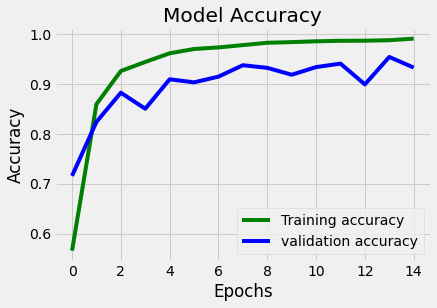

In [ ]:
# Plot training & validation accuracy values

value1 = history.history['acc']
value2 = history.history['val_acc']
plt.style.use('fivethirtyeight')
epochs = range(len(value1))
plt.plot(epochs, value1, 'g', label='Training accuracy')
plt.plot(epochs, value2, 'b', label='validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


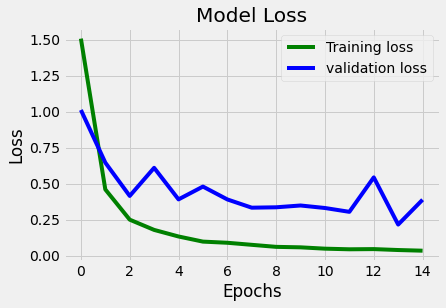

In [ ]:
# Plot training & validation loss values
value3 = history.history['loss']
value4 = history.history['val_loss']
plt.style.use('fivethirtyeight')
epochs = range(len(value3))
plt.plot(epochs, value3, 'g', label='Training loss')
plt.plot(epochs, value4, 'b', label='validation loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


How did the loss and accuracy curves change over time? What does it mean regarding the training process (i.e. overfit, underfit, etc.)? Is that a problem and how would you solve it?

**Write your answers below**

The Training accuracy of model increases uniformly and nearly achieved maximum accuracy, while the validation accuracy is changing with high variance also the accuracy of validation set is lower than the accuracy of Training set which the case of OVERFITTING. In Model loss graph we could see that while the loss of training set is going low as compared to the validation loss which is fluctuating and much heigher than the training set loss.

We can increase the model accuracy by trying some regularization method, increasing the training data set and reducing architecture complexity.

Prediction: Pear (class 18) 100.00%


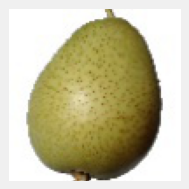

Prediction: Plum 3 (class 53) 100.00%


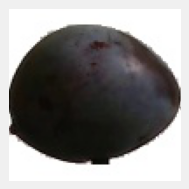

Prediction: Redcurrant (class 11) 100.00%


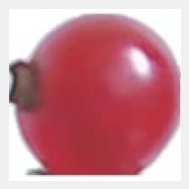

Prediction: Cherry Wax Red (class 30) 100.00%


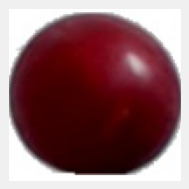

In [ ]:
import keras
trained_classes_labels = list(test_img_itr.class_indices.keys())
test_b=os.listdir('fruits-small/test')
ran=np.random.permutation(len(test_b))


for i in ran[:4]:
  path = 'fruits-small/test/' + test_b[i]
  images=os.listdir(path)
  sfld_img = np.random.permutation(len(images))[0] 
  img_path = path + '/' + images[sfld_img]
  loaded_image = keras.preprocessing.image.load_img(path=img_path, target_size=(img_width,img_height,3))
  #convert to array and resample dividing by 255
  img_array = keras.preprocessing.image.img_to_array(loaded_image) / 255
  
  #add sample dimension. the predictor is expecting (1, CHANNELS, IMG_WIDTH, IMG_HEIGHT)
  img_np_array = np.expand_dims(img_array, axis = 0)
  #img_class = my_model.predict_classes(img_np_array)
  
  predictions = model.predict(img_np_array)
  
  classidx = np.argmax(predictions[0])
  label = trained_classes_labels[classidx]

  predictions_pct = ["{:.2f}%".format(prob * 100) for prob in predictions[0] ]
  #pprint(dict(zip(trained_classes_labels, predictions_pct)) )

  print("Prediction: %s (class %s) %s" % (label, classidx, predictions_pct[classidx])) 
  #print("Filename: %s (%s)" % (test_labels[i],images[shuffled_image]))

  plt.figure(figsize=(3,3))
  plt.imshow(img_array)
  #title=a[i]+": "+b[ran]
  #plt.title(title)
  plt.xticks([])
  plt.yticks([])
  plt.show()


Finally, calculate the performance of your model on the test set:

In [ ]:
scores = model.evaluate_generator(generator=test_img_itr)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.25679928545849184
Test accuracy: 0.9564459875508698
